<img style="float: left;;" src='Figures/alinco.png' /></a>
# <center> <font color= #000047> Intervalos </font> </center>

In [1]:
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

In [6]:
boston.data.shape

(506, 13)

In [7]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
boston.target.shape

(506,)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import LinearRegression

In [13]:
df_bosoton = pd.DataFrame(data=boston.data, columns = boston.feature_names)

In [14]:
df_bosoton

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [15]:
df_bosoton.to_csv('Boston.csv')

# Extracción de características por intervalos

In [16]:
data = pd.read_csv('Data/h2o.csv')

In [17]:
data.head()

,x,fecha
0,0.429795,1991-07-01
1,0.400906,1991-08-01
2,0.432159,1991-09-01
3,0.492543,1991-10-01
4,0.502369,1991-11-01


In [18]:
data['fecha'].dtype

dtype('O')

In [19]:
data['fecha'] = pd.to_datetime(data['fecha'])


In [22]:
type(data['fecha'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [24]:
data['fecha'].dt.year, data['fecha'].dt.month

(0      1991
 1      1991
 2      1991
 3      1991
 4      1991
        ... 
 199    2008
 200    2008
 201    2008
 202    2008
 203    2008
 Name: fecha, Length: 204, dtype: int64,
 0       7
 1       8
 2       9
 3      10
 4      11
        ..
 199     2
 200     3
 201     4
 202     5
 203     6
 Name: fecha, Length: 204, dtype: int64)

In [26]:
data['año'] = data.fecha.dt.year

In [27]:
data['mes'] = data.fecha.dt.month

In [28]:
data.head()

,x,fecha,año,mes
0,0.429795,1991-07-01,1991,7
1,0.400906,1991-08-01,1991,8
2,0.432159,1991-09-01,1991,9
3,0.492543,1991-10-01,1991,10
4,0.502369,1991-11-01,1991,11


In [31]:
datetime.datetime.timestamp(data['fecha'][0])

678348000.0

In [32]:
data['seg'] = data['fecha'].map(datetime.datetime.timestamp)
data.head()

,x,fecha,año,mes,seg
0,0.429795,1991-07-01,1991,7,678348000.0
1,0.400906,1991-08-01,1991,8,681026400.0
2,0.432159,1991-09-01,1991,9,683704800.0
3,0.492543,1991-10-01,1991,10,686296800.0
4,0.502369,1991-11-01,1991,11,688975200.0


In [33]:
w = data['seg']/(60*60*24*365.2425)*2*np.pi #un año equivale a 31536000 segundos
data['sin t'] = np.sin(w)
data['cos t'] = np.cos(w)

<AxesSubplot:>

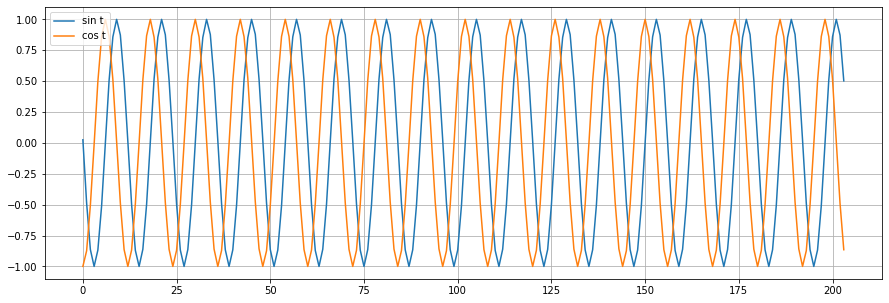

In [34]:
data[['sin t', 'cos t']].plot(grid=True, figsize=(15,5))

<AxesSubplot:>

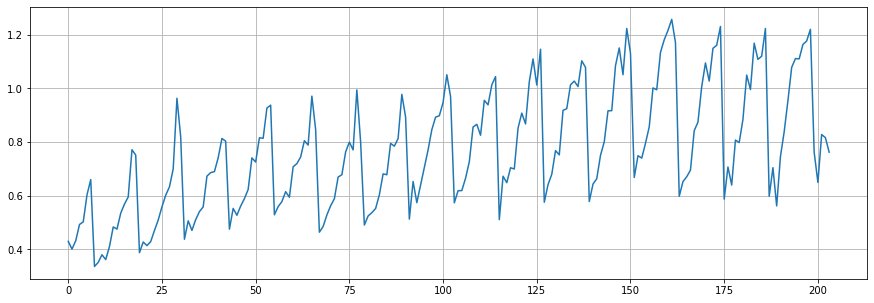

In [35]:
data['x'].plot(grid=True, figsize=(15,5))

In [36]:
data.shape

(204, 7)

## Extracción de características por intervalos

In [37]:
data.head()

,x,fecha,año,mes,seg,sin t,cos t
0,0.429795,1991-07-01,1991,7,678348000.0,0.025178,-0.999683
1,0.400906,1991-08-01,1991,8,681026400.0,-0.486523,-0.873668
2,0.432159,1991-09-01,1991,9,683704800.0,-0.863108,-0.505020
3,0.492543,1991-10-01,1991,10,686296800.0,-0.999911,-0.013321
4,0.502369,1991-11-01,1991,11,688975200.0,-0.867837,0.496849


In [40]:
me = []
std = []
tendencia = []
w = 6         # Tamaño de la ventana
x = data['x'] # SSerie de tiempo

lin = LinearRegression()
for i in range(len(x)-w):
    me.append(x[i:i+w].mean()) #Media del intervalo
    std.append(x[i:i+w].std()) #desviación estándar del intervalo
    
    t = data['seg'][i:i+w].values/(60*60*24*365.2425) #el tiempo en seg
    lin.fit(t.reshape(-1,1), x[i:i+w]) # El entrenamiento de la regresión lineal para cada intervalo
    tendencia.append(lin.coef_[0])      # la tendencia representa la pendiente de la regresión lineal en cada intervalo
    
    

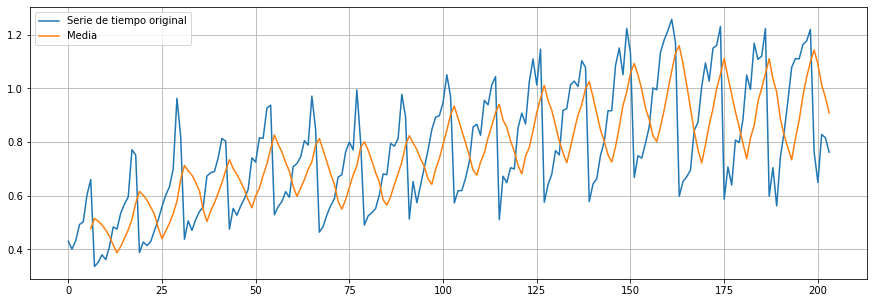

In [41]:
plt.figure(figsize=(15,5))
plt.plot(x, label='Serie de tiempo original')
plt.plot(data.index[w:], me, label='Media')
plt.legend()
plt.grid()

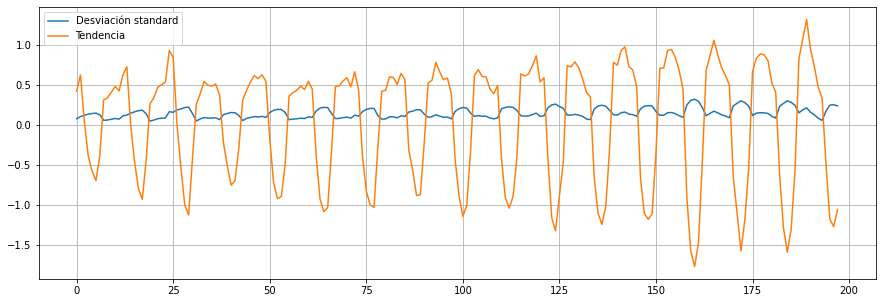

In [42]:
plt.figure(figsize=(15,5))
plt.plot(std, label='Desviación standard')
plt.plot(tendencia, label='Tendencia')
plt.legend()
plt.grid()

# Regresión

In [43]:
from scipy.stats import zscore

In [ ]:
# z = (x-x.mean())/std

In [44]:
X=zscore(np.array([me,std,tendencia,data['sin t'].values[w:],data['cos t'].values[w:]]).T)
Y=zscore(data['x'][w:])
X.shape,Y.shape

((198, 5), (198,))

In [46]:
pd.DataFrame(X)

,0,1,2,3,4
0,-1.700067,-1.130935,0.538986,-0.034392,1.404260
1,-1.478970,-0.705939,0.812030,0.684321,1.208680
2,-1.541065,-0.431063,0.028035,1.179728,0.716360
3,-1.618638,-0.205801,-0.553995,1.380849,-0.002163
4,-1.726857,-0.082109,-0.808542,1.201542,-0.702196
...,...,...,...,...,...
193,2.138556,-1.464674,0.417433,0.686833,1.207195
194,1.834833,0.381430,-0.674032,1.181226,0.713851
195,1.391777,1.636036,-1.620813,1.380866,-0.005086
196,1.120986,1.714518,-1.745303,1.200117,-0.704747


<AxesSubplot:>

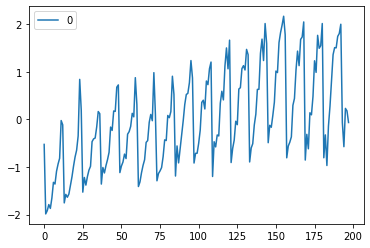

In [49]:
pd.DataFrame(Y).plot()

In [50]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [51]:
nnet=keras.Sequential([
                       keras.Input(shape=(5,)),
                       layers.Dense(5,activation=tf.nn.tanh),
                       layers.Dense(1,activation=tf.nn.tanh)
])
nnet.compile(loss='mean_squared_error',optimizer='sgd')

In [52]:
nnet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


In [54]:
nnet.fit(X,Y/2,epochs=1000)

Epoch 1/1000
7/7 [==============================] - 0s 1000us/step - loss: 0.0362
Epoch 2/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0362
Epoch 3/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0362
Epoch 4/1000
7/7 [==============================] - 0s 857us/step - loss: 0.0361
Epoch 5/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0361
Epoch 6/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0361
Epoch 7/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0361
Epoch 8/1000
7/7 [==============================] - 0s 999us/step - loss: 0.0360
Epoch 9/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0360
Epoch 10/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0359
Epoch 11/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0359
Epoch 12/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0359
Epoch 13/1000
7/7 [=======================

Epoch 102/1000
7/7 [==============================] - ETA: 0s - loss: 0.039 - 0s 2ms/step - loss: 0.0334
Epoch 103/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0334
Epoch 104/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0333
Epoch 105/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0334
Epoch 106/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0332
Epoch 107/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0332
Epoch 108/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0332
Epoch 109/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0332
Epoch 110/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0332
Epoch 111/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0331
Epoch 112/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0331
Epoch 113/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0331
Epoc

7/7 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 203/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 204/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 205/1000
7/7 [==============================] - 0s 857us/step - loss: 0.0309
Epoch 206/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0308
Epoch 207/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0308
Epoch 208/1000
7/7 [==============================] - 0s 857us/step - loss: 0.0308
Epoch 209/1000
7/7 [==============================] - 0s 857us/step - loss: 0.0307
Epoch 210/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0308
Epoch 211/1000
7/7 [==============================] - 0s 1000us/step - loss: 0.0307
Epoch 212/1000
7/7 [==============================] - 0s 571us/step - loss: 0.0307
Epoch 213/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0307
Epoch 214/1000
7/7 [============

7/7 [==============================] - 0s 858us/step - loss: 0.0287
Epoch 303/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0287
Epoch 304/1000
7/7 [==============================] - 0s 857us/step - loss: 0.0287
Epoch 305/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0287
Epoch 306/1000
7/7 [==============================] - 0s 714us/step - loss: 0.0287
Epoch 307/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0287
Epoch 308/1000
7/7 [==============================] - 0s 714us/step - loss: 0.0286
Epoch 309/1000
7/7 [==============================] - 0s 714us/step - loss: 0.0286
Epoch 310/1000
7/7 [==============================] - 0s 714us/step - loss: 0.0286
Epoch 311/1000
7/7 [==============================] - 0s 714us/step - loss: 0.0286
Epoch 312/1000
7/7 [==============================] - 0s 1000us/step - loss: 0.0286
Epoch 313/1000
7/7 [==============================] - 0s 715us/step - loss: 0.0285
Epoch 314/1000
7/7 [====

7/7 [==============================] - 0s 714us/step - loss: 0.0269
Epoch 402/1000
7/7 [==============================] - 0s 714us/step - loss: 0.0268
Epoch 403/1000
7/7 [==============================] - 0s 571us/step - loss: 0.0268
Epoch 404/1000
7/7 [==============================] - 0s 571us/step - loss: 0.0268
Epoch 405/1000
7/7 [==============================] - 0s 714us/step - loss: 0.0268
Epoch 406/1000
7/7 [==============================] - 0s 714us/step - loss: 0.0268
Epoch 407/1000
7/7 [==============================] - 0s 714us/step - loss: 0.0268
Epoch 408/1000
7/7 [==============================] - 0s 572us/step - loss: 0.0268
Epoch 409/1000
7/7 [==============================] - 0s 714us/step - loss: 0.0267
Epoch 410/1000
7/7 [==============================] - 0s 714us/step - loss: 0.0267
Epoch 411/1000
7/7 [==============================] - 0s 857us/step - loss: 0.0267
Epoch 412/1000
7/7 [==============================] - 0s 714us/step - loss: 0.0267
Epoch 413/1000
7/7 

7/7 [==============================] - 0s 1ms/step - loss: 0.0252
Epoch 501/1000
7/7 [==============================] - 0s 1000us/step - loss: 0.0253
Epoch 502/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0252
Epoch 503/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0252
Epoch 504/1000
7/7 [==============================] - 0s 857us/step - loss: 0.0252
Epoch 505/1000
7/7 [==============================] - 0s 714us/step - loss: 0.0252
Epoch 506/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0252
Epoch 507/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0251
Epoch 508/1000
7/7 [==============================] - 0s 857us/step - loss: 0.0251
Epoch 509/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0252
Epoch 510/1000
7/7 [==============================] - 0s 857us/step - loss: 0.0251
Epoch 511/1000
7/7 [==============================] - 0s 714us/step - loss: 0.0251
Epoch 512/1000
7/7 [==========

7/7 [==============================] - 0s 714us/step - loss: 0.0238
Epoch 600/1000
7/7 [==============================] - 0s 857us/step - loss: 0.0238
Epoch 601/1000
7/7 [==============================] - 0s 714us/step - loss: 0.0238
Epoch 602/1000
7/7 [==============================] - 0s 857us/step - loss: 0.0238
Epoch 603/1000
7/7 [==============================] - 0s 571us/step - loss: 0.0238
Epoch 604/1000
7/7 [==============================] - 0s 857us/step - loss: 0.0238
Epoch 605/1000
7/7 [==============================] - 0s 857us/step - loss: 0.0237
Epoch 606/1000
7/7 [==============================] - 0s 715us/step - loss: 0.0237
Epoch 607/1000
7/7 [==============================] - 0s 856us/step - loss: 0.0237
Epoch 608/1000
7/7 [==============================] - 0s 1000us/step - loss: 0.0237
Epoch 609/1000
7/7 [==============================] - 0s 857us/step - loss: 0.0237
Epoch 610/1000
7/7 [==============================] - 0s 714us/step - loss: 0.0237
Epoch 611/1000
7/7

7/7 [==============================] - 0s 1ms/step - loss: 0.0226
Epoch 699/1000
7/7 [==============================] - 0s 1000us/step - loss: 0.0226
Epoch 700/1000
7/7 [==============================] - 0s 1000us/step - loss: 0.0226
Epoch 701/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0226
Epoch 702/1000
7/7 [==============================] - 0s 714us/step - loss: 0.0226
Epoch 703/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0226
Epoch 704/1000
7/7 [==============================] - 0s 714us/step - loss: 0.0225
Epoch 705/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0225
Epoch 706/1000
7/7 [==============================] - 0s 714us/step - loss: 0.0225
Epoch 707/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0226
Epoch 708/1000
7/7 [==============================] - 0s 857us/step - loss: 0.0225
Epoch 709/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0225
Epoch 710/1000
7/7 [=========

7/7 [==============================] - 0s 1000us/step - loss: 0.0216
Epoch 799/1000
7/7 [==============================] - 0s 1000us/step - loss: 0.0216
Epoch 800/1000
7/7 [==============================] - 0s 858us/step - loss: 0.0216
Epoch 801/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.0216
Epoch 802/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0216
Epoch 803/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0215
Epoch 804/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0215
Epoch 805/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0215
Epoch 806/1000
7/7 [==============================] - 0s 1000us/step - loss: 0.0215
Epoch 807/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0215
Epoch 808/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0215
Epoch 809/1000
7/7 [==============================] - 0s 857us/step - loss: 0.0215
Epoch 810/1000
7/7 [==========

Epoch 898/1000
7/7 [==============================] - 0s 857us/step - loss: 0.0207
Epoch 899/1000
7/7 [==============================] - 0s 858us/step - loss: 0.0207
Epoch 900/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0207
Epoch 901/1000
7/7 [==============================] - 0s 857us/step - loss: 0.0207
Epoch 902/1000
7/7 [==============================] - 0s 715us/step - loss: 0.0207
Epoch 903/1000
7/7 [==============================] - 0s 858us/step - loss: 0.0207
Epoch 904/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0206
Epoch 905/1000
7/7 [==============================] - 0s 857us/step - loss: 0.0206
Epoch 906/1000
7/7 [==============================] - 0s 857us/step - loss: 0.0206
Epoch 907/1000
7/7 [==============================] - 0s 857us/step - loss: 0.0206
Epoch 908/1000
7/7 [==============================] - 0s 1000us/step - loss: 0.0206
Epoch 909/1000
7/7 [==============================] - 0s 714us/step - loss: 0.0206
Epoch 9

7/7 [==============================] - 0s 857us/step - loss: 0.0199
Epoch 998/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0199
Epoch 999/1000
7/7 [==============================] - 0s 857us/step - loss: 0.0199
Epoch 1000/1000
7/7 [==============================] - 0s 857us/step - loss: 0.0199


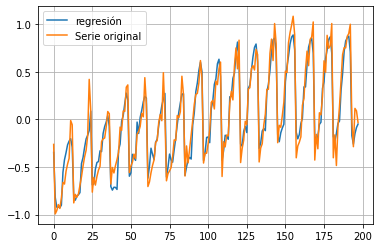

In [55]:
y=nnet(X) #Predicción de la serie de tiempo
plt.plot(y,label='regresión')
plt.plot(Y/2,label='Serie original')
plt.legend()
plt.grid()

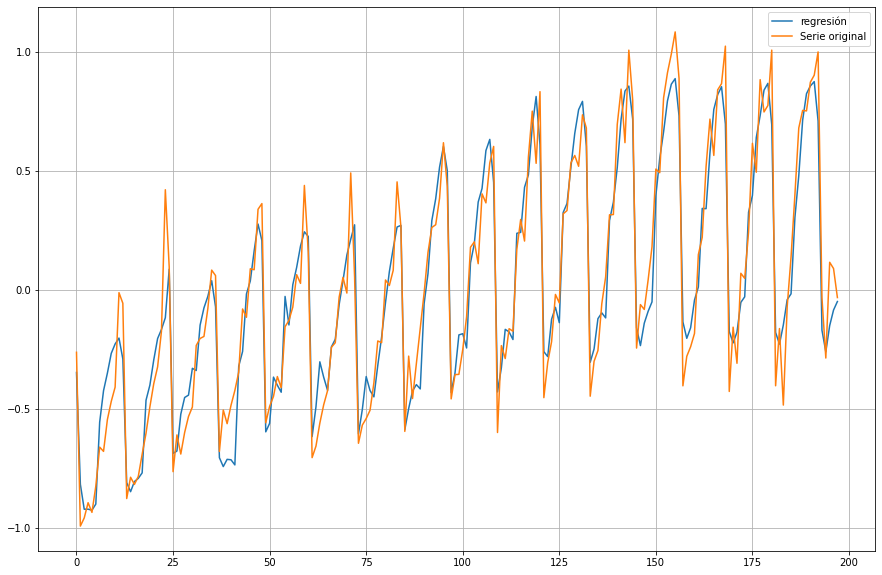

In [56]:
plt.figure(figsize=(15,10))
plt.plot(y,label='regresión')
plt.plot(Y/2,label='Serie original')
plt.legend()
plt.grid()